In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns

In [2]:
train_df = pd.read_csv ('churn_train.csv')
test_df = pd.read_csv ('churn_test.csv')

**Anyalser datan**

In [3]:
train_df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1768-ZAIFU,Female,1,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.20,25.2,Yes
1,2159-TURXX,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.05,95.55,No
2,8261-GWDBQ,Female,1,Yes,No,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.05,6925.9,No
3,2732-ISEZX,Female,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.50,104.3,No
4,7607-QKKTJ,Male,0,Yes,Yes,45,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,One year,Yes,Credit card (automatic),95.00,4368.85,No
5,7493-GVFIO,Male,0,No,No,57,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.55,1252.85,No
6,8436-BJUMM,Male,0,Yes,Yes,26,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.75,2070.6,Yes
7,8908-NMQTX,Male,0,No,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),65.60,4566.5,No
8,7938-OUHIO,Male,0,No,No,3,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.70,293.65,Yes
9,0913-XWSCN,Male,0,Yes,Yes,55,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),85.50,4713.4,No


In [4]:
test_df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9505-SQFSW,Female,0,Yes,Yes,3,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,40.30,92.5,No
1,1723-HKXJQ,Male,0,No,No,42,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.75,4273.45,Yes
2,9154-QDGTH,Male,0,Yes,Yes,43,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),104.30,4451.85,No
3,8309-IEYJD,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.60,70.6,No
4,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
5,6463-HHXJR,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Two year,No,Bank transfer (automatic),100.50,7030.65,No
6,9372-TXXPS,Female,0,Yes,No,60,Yes,No,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),59.85,3483.45,No
7,7112-OPOTK,Male,0,No,No,33,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,68.25,2171.15,Yes
8,2876-VBBBL,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.25,20.25,Yes
9,1135-LMECX,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.85,19.85,No


Vi börjar med att kolla på vad vi har för attributs. 

In [5]:
train_df.shape

(5634, 21)

In [6]:
test_df.shape

(1409, 21)

In [7]:
train_df.nunique()

customerID          5634
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1499
TotalCharges        5290
Churn                  2
dtype: int64

In [8]:
test_df.nunique()

customerID          1409
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges       809
TotalCharges        1373
Churn                  2
dtype: int64

In [9]:
train_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
train_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
attribute_counts = train_df['Churn'].value_counts()
print (attribute_counts)

No     4148
Yes    1486
Name: Churn, dtype: int64


In [12]:
attribute_counts = test_df['Churn'].value_counts()
print (attribute_counts)

No     1026
Yes     383
Name: Churn, dtype: int64


In [13]:
null_values =  train_df.isnull()
null_true = null_values.sum().sum()
null_false = null_values.size - null_true
list_of_null = f"{null_true} True and {null_false} False"
print (list_of_null)

0 True and 118314 False


In [14]:
null_values =  test_df.isnull()
null_true = null_values.sum().sum()
null_false = null_values.size - null_true
list_of_null = f"{null_true} True and {null_false} False"
print (list_of_null)

0 True and 29589 False


In [15]:
dupe= train_df.duplicated()
dupe_true = dupe.sum().sum()
dupe_false = dupe.size - dupe_true
list_of_dupe = f"{dupe_true} Dupes and {dupe_false} Non Dupes"
print (list_of_dupe)

0 Dupes and 5634 Non Dupes


In [16]:
dupe= test_df.duplicated()
dupe_true = dupe.sum().sum()
dupe_false = dupe.size - dupe_true
list_of_dupe = f"{dupe_true} Dupes and {dupe_false} Non Dupes"
print (list_of_dupe)

0 Dupes and 1409 Non Dupes


Det finns varken dupes eller null värden.

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

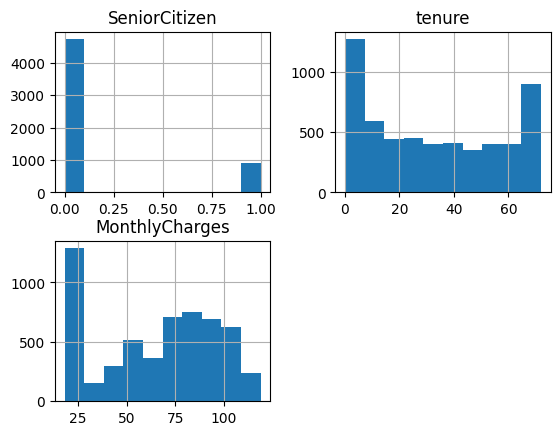

In [17]:
train_df.hist()

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

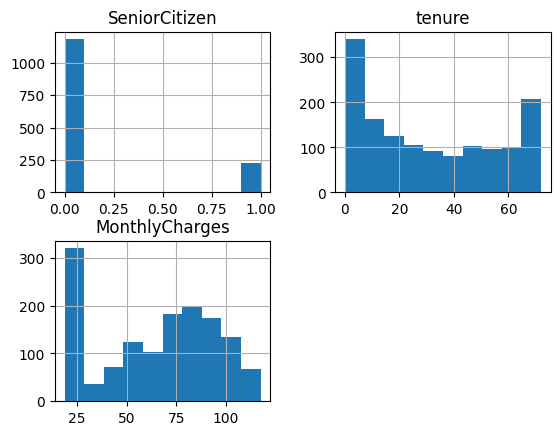

In [18]:
test_df.hist()

**Förbered datan för att kunna användas av modellen**

*Finns det data som ej borde användas?*
svar: Customerid ska inte användas för att den är alltid unik.

In [19]:
train_df.drop('customerID', axis=1, inplace=True)


In [20]:
test_df.drop('customerID', axis=1, inplace=True)


In [21]:
train_df.head(15)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,1,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.20,25.2,Yes
1,Male,0,No,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.05,95.55,No
2,Female,1,Yes,No,60,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.05,6925.9,No
3,Female,0,No,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.50,104.3,No
4,Male,0,Yes,Yes,45,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,One year,Yes,Credit card (automatic),95.00,4368.85,No
5,Male,0,No,No,57,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.55,1252.85,No
6,Male,0,Yes,Yes,26,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.75,2070.6,Yes
7,Male,0,No,No,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),65.60,4566.5,No
8,Male,0,No,No,3,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.70,293.65,Yes
9,Male,0,Yes,Yes,55,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),85.50,4713.4,No


*Det finns en hel del textdata som måste behandlas på något vis (finns flera
olika alternativ, där vissa metoder är mer lämpade för neurala nätverk).*

In [22]:
def encode_columns(train_df, test_df):
    combined_df = pd.concat([train_df, test_df])
    le = LabelEncoder()
    for c in train_df.columns:
        if train_df[c].dtype == 'object':
            le.fit(combined_df[c])
            train_df[c] = le.transform(train_df[c])
            test_df[c] = le.transform(test_df[c])
            continue
        if train_df[c].dtype == 'float64':
            le.fit(combined_df[c])
            train_df[c] = le.transform(train_df[c])
            test_df[c] = le.transform(test_df[c])
            continue
            train_df[c] = train_df[c].astype(int)
            test_df[c] = test_df[c].astype(int)
    return train_df, test_df

In [23]:
encode_train_df, encode_test_df = encode_columns(train_df, test_df)

In [24]:
encode_test_df.dtypes

gender              int32
SeniorCitizen       int64
Partner             int32
Dependents          int32
tenure              int64
PhoneService        int32
MultipleLines       int32
InternetService     int32
OnlineSecurity      int32
OnlineBackup        int32
DeviceProtection    int32
TechSupport         int32
StreamingTV         int32
StreamingMovies     int32
Contract            int32
PaperlessBilling    int32
PaymentMethod       int32
MonthlyCharges      int64
TotalCharges        int32
Churn               int32
dtype: object

In [25]:
encode_test_df.dtypes

gender              int32
SeniorCitizen       int64
Partner             int32
Dependents          int32
tenure              int64
PhoneService        int32
MultipleLines       int32
InternetService     int32
OnlineSecurity      int32
OnlineBackup        int32
DeviceProtection    int32
TechSupport         int32
StreamingTV         int32
StreamingMovies     int32
Contract            int32
PaperlessBilling    int32
PaymentMethod       int32
MonthlyCharges      int64
TotalCharges        int32
Churn               int32
dtype: object

In [26]:
encode_train_df.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,2,96,2151,1
1,1,0,0,0,5,1,0,2,1,1,1,1,1,1,0,0,1,30,6444,0
2,0,1,1,0,60,1,2,1,2,2,2,2,2,2,2,1,0,1558,5466,0
3,0,0,0,0,5,1,0,2,1,1,1,1,1,1,0,1,3,39,80,0
4,1,0,1,1,45,1,2,1,0,2,2,0,0,2,1,1,1,1188,3709,0
5,1,0,0,0,57,1,0,2,1,1,1,1,1,1,2,0,1,40,460,0
6,1,0,1,1,26,1,2,1,0,0,0,0,2,0,0,1,2,970,1696,1
7,1,0,0,0,72,0,1,0,2,2,2,2,2,2,2,1,0,640,3888,0
8,1,0,0,0,3,1,0,1,0,0,2,2,2,2,0,1,2,1256,2532,1
9,1,0,1,1,55,1,2,1,0,0,0,0,0,2,0,0,0,1005,3991,0


*Träna 5 olika neurala nätverk och jämför tiden de tar att träna (låt resten av
parametrarna vara default och använd samma random state för att få bättre
jämförelse av tiden)*

In [27]:
X_train = encode_train_df.drop(columns=['Churn'])
X_test = encode_test_df.drop(columns=['Churn'])
y_test = encode_test_df['Churn']
y_train = encode_train_df['Churn']

4 gömda lager med 5 neuroner i varje, learning rate 0.01

In [28]:
model_1 = MLPClassifier(hidden_layer_sizes=(5,5,5,5), learning_rate='constant', learning_rate_init=0.01, max_iter=200, random_state=42)

In [29]:
%%time
model_1.fit(X_train,y_train)

CPU times: total: 250 ms
Wall time: 947 ms


MLPClassifier(hidden_layer_sizes=(5, 5, 5, 5), learning_rate_init=0.01,
              random_state=42)

In [30]:
predictions = model_1.predict(X_train)

In [31]:
accuracy_score(y_train,predictions)

0.7362442314518992

In [32]:
predict_1 = model_1.predict(X_test)

In [33]:
accuracy_score(y_test,predict_1)

0.7281760113555713

2 gömda lager med 100 neuroner, learning rate 0.01

In [34]:
model_2 = MLPClassifier(hidden_layer_sizes=(100,100), learning_rate='constant', learning_rate_init=0.01, max_iter=200, random_state=None)

In [35]:
%%time
model_2.fit(X_train,y_train)

CPU times: total: 438 ms
Wall time: 916 ms


MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=0.01)

In [36]:
predictions_2 = model_2.predict(X_train)

In [37]:
accuracy_score(y_train,predictions_2)

0.7877174298899539

In [38]:
predict_2 = model_2.predict(X_test)

In [39]:
accuracy_score(y_test,predict_2)

0.7714691270404542

10 gömda lager med 100 neuroner i varje, learning rate 0.01

In [40]:
model_3 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100,100,100,100), learning_rate='constant', learning_rate_init=0.01, max_iter=200, random_state=42)

In [41]:
%%time
model_3.fit(X_train,y_train)

CPU times: total: 7.09 s
Wall time: 13.6 s


MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100,
                                  100),
              learning_rate_init=0.01, random_state=42)

In [42]:
predictions_3 = model_3.predict(X_train)

In [43]:
accuracy_score(y_train,predictions_3)

0.8003194888178914

In [44]:
predict_3 = model_3.predict(X_test)

In [45]:
accuracy_score(y_test,predict_3)

0.7842441447835344

2 gömda lager med 100 neuroner, learning rate 0.0001

In [46]:

model_4 = MLPClassifier(hidden_layer_sizes=(100,100), learning_rate='constant', learning_rate_init=0.0001, max_iter=200, random_state=42)

In [47]:
%%time
model_4.fit(X_train,y_train)

CPU times: total: 438 ms
Wall time: 1.63 s


MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=0.0001,
              random_state=42)

In [48]:
predictions_4 = model_4.predict(X_train)

In [49]:
accuracy_score(y_train,predictions_4)

0.7900248491302805

In [50]:
predict_4 = model_4.predict(X_test)

In [51]:
accuracy_score(y_test,predict_4)

0.7650816181689141

2 gömda lager med 100 neuroner, learning rate 0.00001

In [52]:

model_5 = MLPClassifier(hidden_layer_sizes=(100,100), learning_rate='constant', learning_rate_init=0.00001, max_iter=200, random_state=42)

In [53]:
%%time
model_5.fit(X_train,y_train)

CPU times: total: 2.06 s
Wall time: 7.16 s


MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=1e-05,
              random_state=42)

In [54]:
predictions_5 = model_5.predict(X_train)

In [55]:
accuracy_score(y_train,predictions_5)

0.7925097621583245

In [56]:
predict_5 = model_5.predict(X_test)

In [57]:
accuracy_score (y_test,predict_5)

0.7735982966643009

**Rita ut en confusion matrix och analysera hur modellen gör
prediktioner och vilka typer av fel den gör.**

In [58]:
Con = confusion_matrix(y_test,predict_1)
print (Con)

[[1026    0]
 [ 383    0]]


<Axes: >

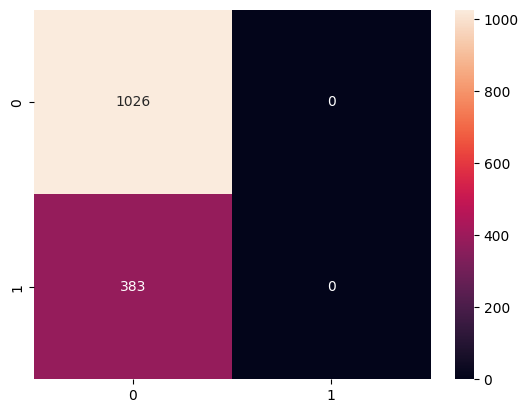

In [59]:
sns.heatmap(Con, annot=True, fmt='d')

In [60]:
report_1 = classification_report (y_test,predict_1)
print("\nClassification Report:")
print (report_1)


Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1026
           1       0.00      0.00      0.00       383

    accuracy                           0.73      1409
   macro avg       0.36      0.50      0.42      1409
weighted avg       0.53      0.73      0.61      1409



C:\Users\nille\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nille\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nille\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Med första modellen, kommer det upp ingen fake postive eller fake true negative. 


In [61]:
Con_2 = confusion_matrix(y_test,predict_2)
print (Con_2)

[[909 117]
 [205 178]]


<Axes: >

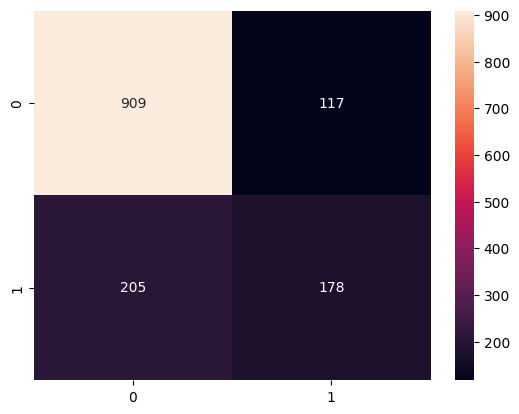

In [62]:
sns.heatmap(Con_2, annot=True, fmt='d')

In [63]:
report_2 = classification_report (y_test,predict_2)
print("\nClassification Report:")
print (report_2)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1026
           1       0.60      0.46      0.53       383

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



I jämförelse med model_1, får vi poäng för 1 (0.81, 0.21 och 0.33). recall för 0 är fortfarande väldigt hög 0.98, men den har gått ner lite. 

In [64]:
Con_3= confusion_matrix(y_test,predict_3)
print (Con_3)

[[933  93]
 [211 172]]


<Axes: >

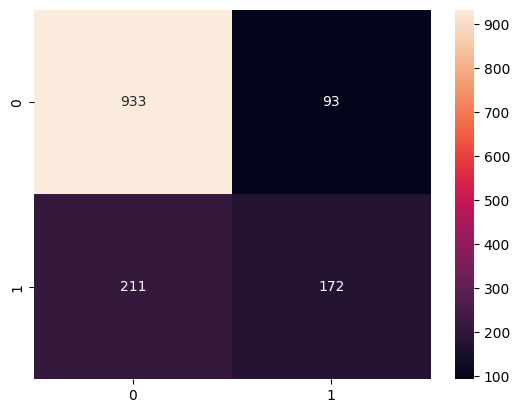

In [65]:
sns.heatmap(Con_3, annot=True, fmt='d')

In [66]:
report_3 = classification_report(y_test,predict_3)
print("\nClassification Report:")
print (report_3)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1026
           1       0.65      0.45      0.53       383

    accuracy                           0.78      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



I jämförelse med model_2, har recall för 0 gått upp medan precision har också gått ner till 0.75. 
på 1 har vi en precision på 0.88, en recall på 0.09 och en F1-score på 0.17.

In [67]:
Con_4 = confusion_matrix(y_test,predict_4)
print (Con_4)

[[880 146]
 [185 198]]


<Axes: >

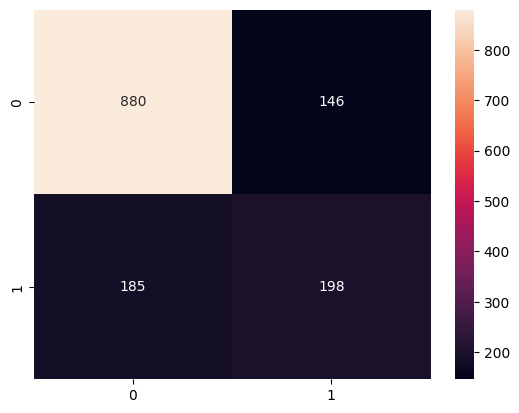

In [68]:
sns.heatmap(Con_4, annot=True, fmt='d')

In [69]:
report_4 = classification_report(y_test,predict_4)
print("\nClassification Report:")
print (report_4)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1026
           1       0.58      0.52      0.54       383

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.77      0.76      1409



model_4 har den högsta f1-score för 1 bland alla modellerna (0.45) och har också den högsta recall på 1 (0.33).  precision är på 0.70 för 1. 
Den har också den högsta accuarcy score för alla modeller med 0.78.

In [70]:
Con_5 = confusion_matrix(y_test,predict_5)
print (Con_5)

[[921 105]
 [214 169]]


<Axes: >

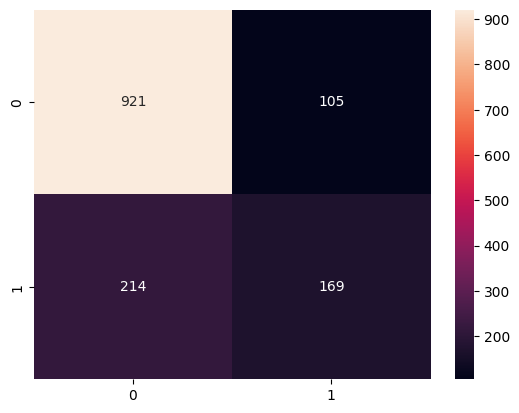

In [71]:
sns.heatmap(Con_5, annot=True, fmt='d')

In [72]:
report_5 = classification_report(y_test,predict_5)
print("\nClassification Report:")
print (report_5)


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1026
           1       0.62      0.44      0.51       383

    accuracy                           0.77      1409
   macro avg       0.71      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409



Slutligen, för model_5 får vi en accuarcy på 0.76. på 1 får vi en precision på 0.68 (den lägsta för alla modellerna), en recall på 0.23 och en f1-score på 0.34. 